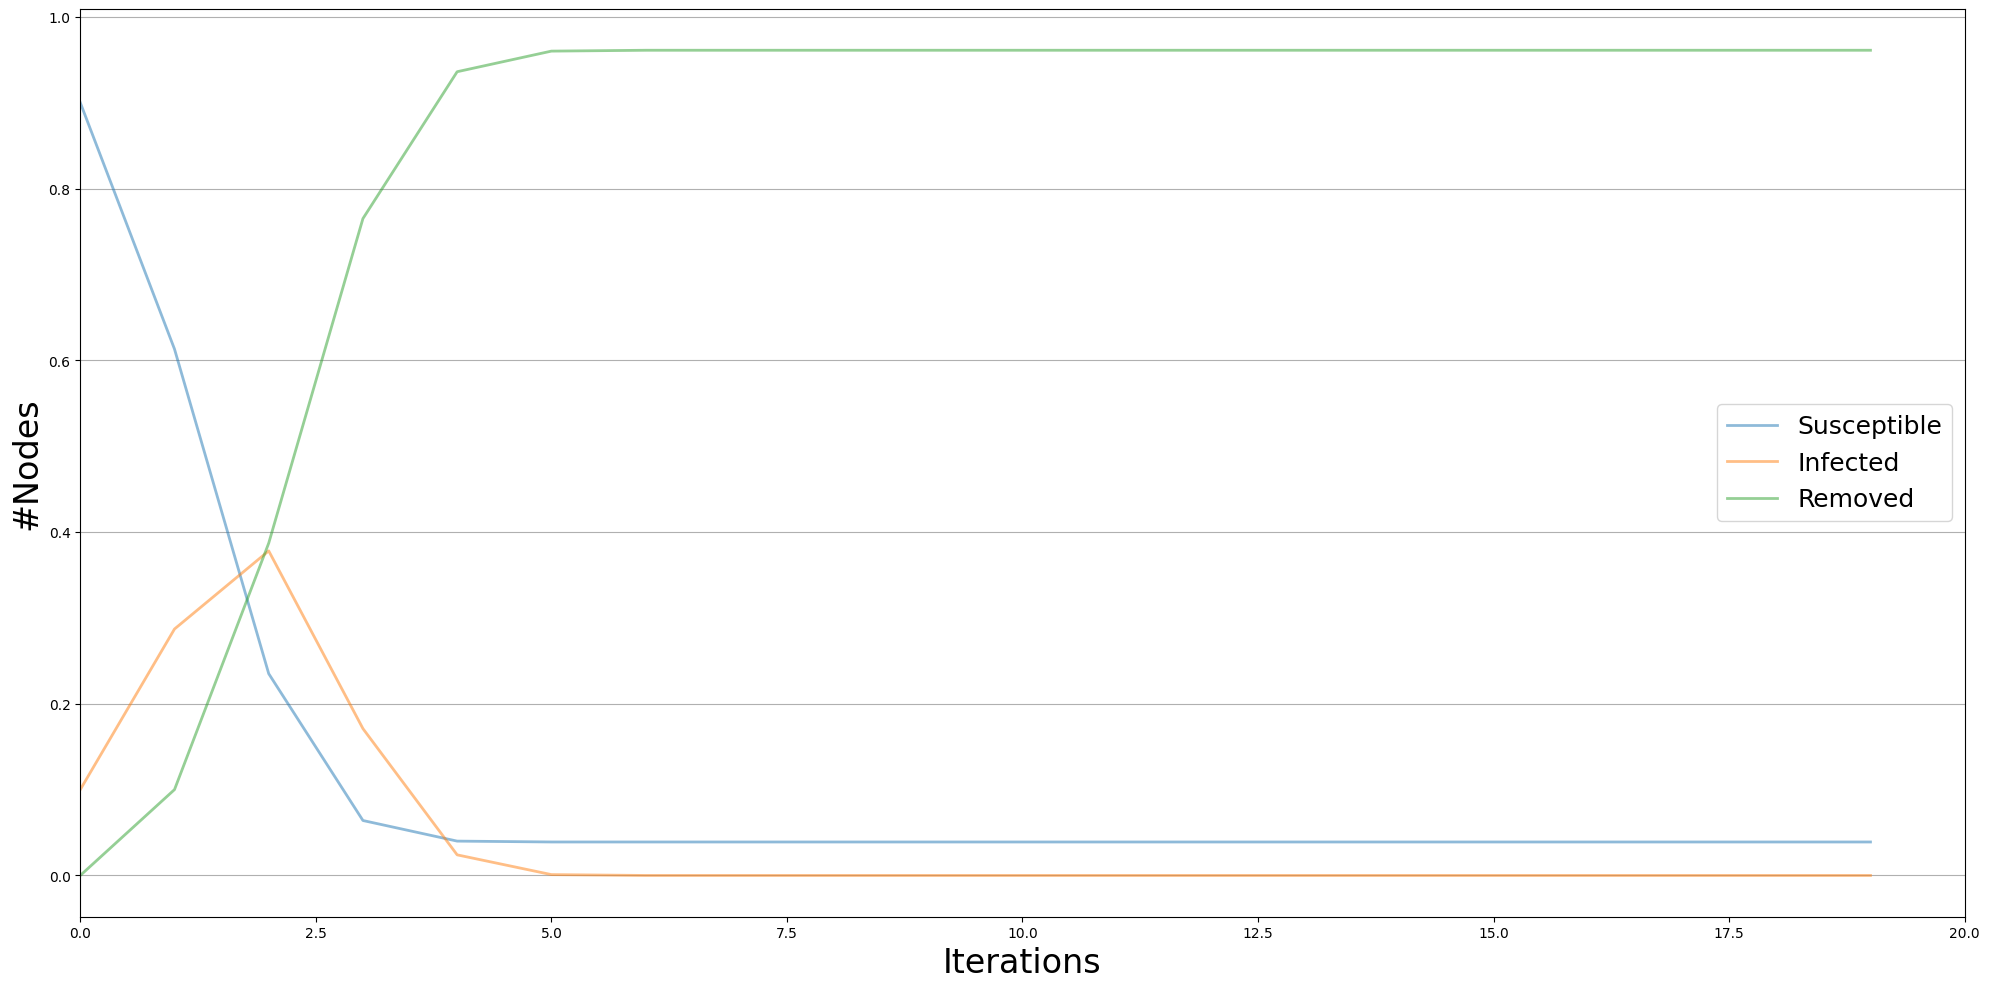

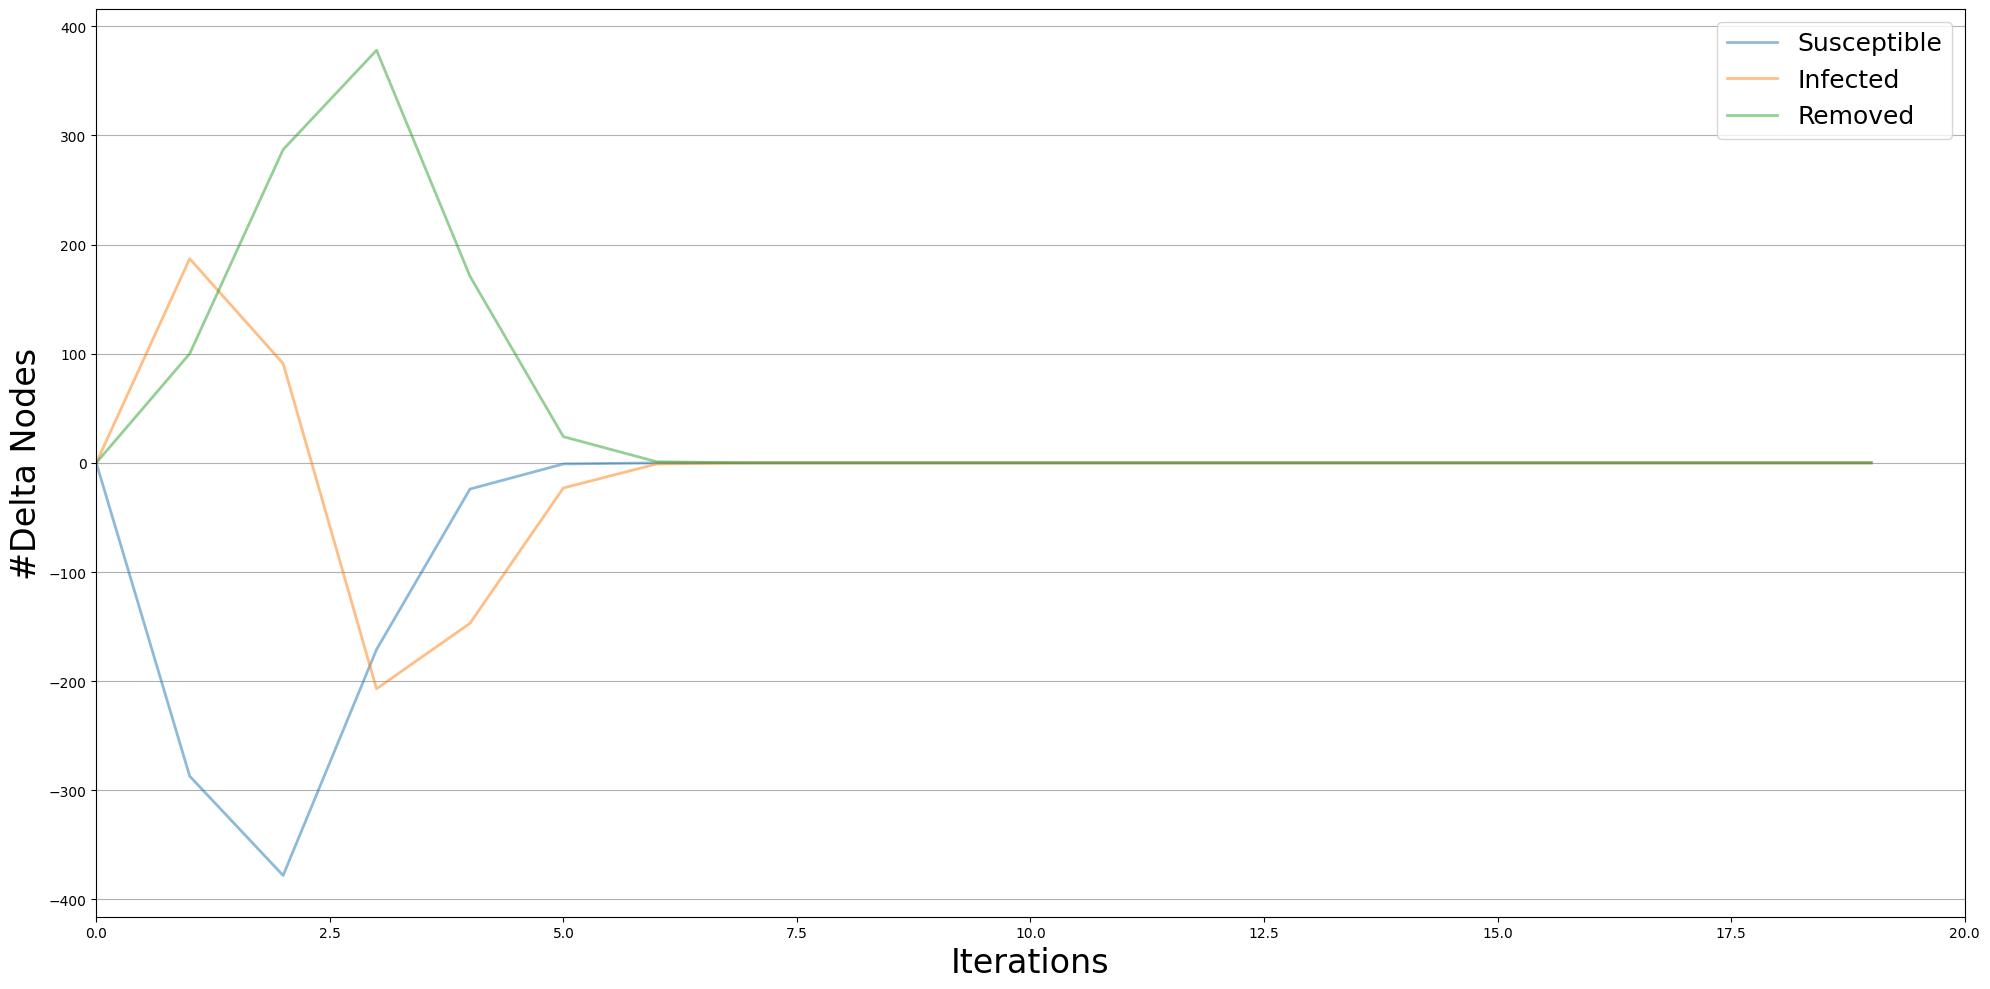

In [6]:
'''
Independent Cascades Model with Community Permeability

This model is a variation of the well-known Independent Cascade (IC), and it is designed to embed community awareness into the IC model. This model exploits 
the idea of permeability. A community is “permeable” to a given content if it permits that content to spread from it fast (or vice-versa, if it permits the 
content to be easily received from nodes outside the community). Conversely, a community has a low degree of permeability if it dampens the diffusion probability across its border.

The ICP model starts with an initial set of active nodes A0; the diffusive process unfolds in discrete steps according to the following randomized rule:

- When node v becomes active in step t, it is given a single chance to activate each currently inactive neighbor u. If v and u belong to the same community, 
  the method works as a standard IC model (it succeeds with a probability p(v,u)); instead, if the nodes  are part of to different communities, the probability p(v,u) is dampened (attenuata) of a factor η
  (the community permeability parameter).
- If u has multiple newly activated neighbors, their attempts are sequenced in an arbitrary order.
- If v succeeds, then u will become active in step t + 1; but whether or not v succeeds, it cannot make any further attempts to activate u in subsequent rounds.
- The process runs until no more activations are possible.

Statuses:
    - 0: Susceptible
    - 1: Infected
    - 2: Removed

Parameters:
    - edge_threshold: the probability that a node will activate its neighbor
    - permeability: comunity permeability


Domande:
- Peche mi dice che manca il parametro com ai nodi quando non viene menzionato nella documentazione?

'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import random
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import json

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.ICPModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1)
config.add_model_parameter('permeability', 0.3)


# Setting the edge parameters
threshold = 0.1
for e in g.edges():
    config.add_edge_configuration("threshold", e, threshold)


communities = {}
for node in range(1000):
    communities[node] = 'comunity' + str(random.randint(1, 10))
    
for node in g.nodes():
    config.add_node_configuration("com", node, communities[node])

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(20)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()
